## 1. Import Libraries

Let us start by importing libraries

In [1]:
pip install tflearn

In [2]:
# used to supress display of warnings
import warnings

# os is used to provide a way of using operating system dependent functionality
# We use it for setting working folder
import os

# Pandas is used for data manipulation and analysis
import pandas as pd 

# Numpy is used for large, multi-dimensional arrays and matrices, along with mathematical operators on these arrays
import numpy as np

# Matplotlib is a data visualization library for 2D plots of arrays, built on NumPy arrays 
# and designed to work with the broader SciPy stack
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot

# Seaborn is based on matplotlib, which aids in drawing attractive and informative statistical graphics.
import seaborn as sns
import tensorflow 
print(tensorflow.__version__)


from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.constraints import maxnorm
from PIL import Image
from PIL import ImageMath

2.5.0


## 2. Setting Options

In [3]:
# suppress display of warnings
warnings.filterwarnings('ignore')

# display all dataframe columns
pd.options.display.max_columns = None

# display all dataframe rows
pd.options.display.max_rows = None

## 3. Data loading and Data Analysis 

In [4]:
import tflearn.datasets.oxflower17 as oxflower17
X, y= oxflower17.load_data()

Instructions for updating:
non-resource variables are not supported in the long term


In [5]:
print ('We have',X.shape[0],'flower images. With dimennsions as :',X.shape[1:])
print ('We have', y.shape[0], 'flower labels.')

We have 1360 flower images. With dimennsions as : (224, 224, 3)
We have 1360 flower labels.


In [6]:
np.unique(y,return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 array([80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80]))

### Visulaizing Data

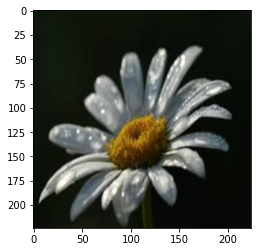

In [7]:
plt.imshow(X[0])

In [8]:
y[0]

2

[ 2  9  0  3  0 12 13 14  2  4 11 10  6  5 11]


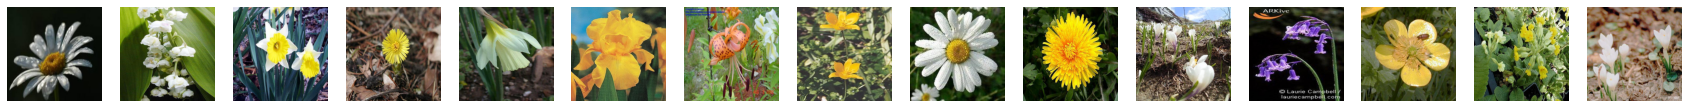

In [9]:
plt.figure(figsize = (30,6))
for i in range(15):
  plt.subplot(1,15,i+1)
  plt.imshow(X[i])
  plt.axis('off')
print(y[0:15])

### Applying Filters 

In [10]:
import cv2
img = X[0]

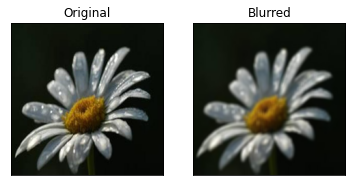

In [11]:
blur = cv2.blur(img,(5,5))
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

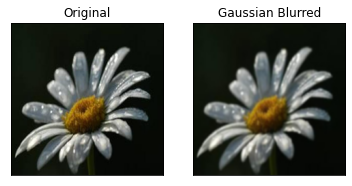

In [12]:
g_blur = cv2.GaussianBlur(img,(5,5),0)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(g_blur),plt.title('Gaussian Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

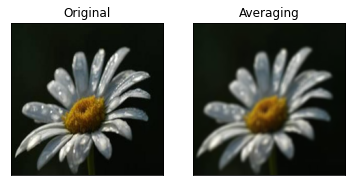

In [13]:
kernel = np.ones((5,5),np.float32)/25
dst = cv2.filter2D(img,-1,kernel)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

## 4.Standardize the data

### Splitting Train & Test

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state =29)

### Visualise the first 15 images in train data and print their corresponding labels.

[13  2 10 15  1 16 10 12  6  0  4  5  3 16  4]


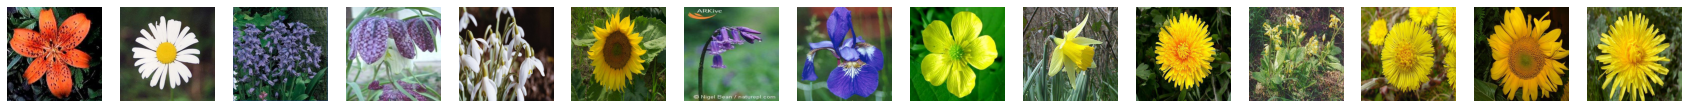

In [15]:
plt.figure(figsize = (30,6))
for i in range(15):
  plt.subplot(1,15,i+1)
  plt.imshow(X_train[i])
  plt.axis('off')
print(y_train[0:15])

### Print shape of the X train and X test data

In [16]:
print('X-Train Shape :',X_train.shape)
print('y-Train Shape :',y_train.shape)
print('X-Test Shape :',X_test.shape)
print('y-Test Shape :',y_test.shape)

X-Train Shape : (1088, 224, 224, 3)
y-Train Shape : (1088,)
X-Test Shape : (272, 224, 224, 3)
y-Test Shape : (272,)


###  One hot encode the labels for train and test labels

In [17]:
## In case of unordered categories use OHE else to_categorical
from tensorflow.keras.utils import to_categorical
y_train_n = to_categorical(y_train)
y_test_n = to_categorical(y_test)

In [18]:
y_train_n[5]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
      dtype=float32)

## 5. Model building

### Define the model architecture using TensorFlow with a Conv2D layer followed by dense layers with activation as ReLu and softmax respectively. 

In [19]:
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [20]:
n_classes = 17
inputshape = (224,224,3)

In [21]:
def cnn_model():
  model = Sequential()
  model.add(Conv2D(64, (2,2), activation= 'relu', input_shape = inputshape))
  model.add(MaxPooling2D(2,2))
  model.add(tensorflow.keras.layers.BatchNormalization())
  model.add(Conv2D(32, (3,3), activation= 'relu'))
  model.add(MaxPooling2D(2,2))
  model.add(Dropout(0.2))
  model.add(Conv2D(16, (2,2), activation= 'relu'))
  model.add(MaxPooling2D(2,2))
  model.add(Flatten())
  model.add(tensorflow.keras.layers.Dense(128, activation='relu'))
  model.add(tensorflow.keras.layers.Dropout(0.25))
  model.add(Dense(n_classes,activation= 'softmax' ))
  return model

In [22]:
cnn = cnn_model()

Instructions for updating:
Colocations handled automatically by placer.


In [23]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 223, 223, 64)      832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 64)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 111, 111, 64)      256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 32)      18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 53, 53, 16)        2

### Compile the above model using appropriate loss metric. Try with sgd, adam optimizer and "accuracy" as metrics. 

In [24]:
ad = optimizers.Adam(lr =0.001)
cnn.compile(optimizer=ad, loss='categorical_crossentropy', metrics=['accuracy'])

### Fit the model on the training dataset along with it's equivalent one hot encoded labels

In [25]:
history = cnn.fit(X_train,y_train_n, validation_data=(X_test,y_test_n),batch_size=34, epochs= 20, verbose =2)

Train on 1088 samples, validate on 272 samples
Epoch 1/20
1088/1088 - 5s - loss: 3.0004 - acc: 0.1195 - val_loss: 2.8265 - val_acc: 0.1103
Epoch 2/20
1088/1088 - 2s - loss: 2.0765 - acc: 0.3272 - val_loss: 2.7813 - val_acc: 0.2132
Epoch 3/20
1088/1088 - 2s - loss: 1.5856 - acc: 0.4715 - val_loss: 2.6483 - val_acc: 0.3015
Epoch 4/20
1088/1088 - 2s - loss: 1.3668 - acc: 0.5331 - val_loss: 2.6532 - val_acc: 0.2941
Epoch 5/20
1088/1088 - 2s - loss: 1.0897 - acc: 0.6507 - val_loss: 2.5287 - val_acc: 0.3529
Epoch 6/20
1088/1088 - 2s - loss: 0.9328 - acc: 0.7022 - val_loss: 2.5177 - val_acc: 0.3493
Epoch 7/20
1088/1088 - 2s - loss: 0.6983 - acc: 0.7638 - val_loss: 2.2833 - val_acc: 0.4265
Epoch 8/20
1088/1088 - 2s - loss: 0.5779 - acc: 0.8125 - val_loss: 2.1906 - val_acc: 0.4890
Epoch 9/20
1088/1088 - 2s - loss: 0.4062 - acc: 0.8594 - val_loss: 1.9660 - val_acc: 0.4963
Epoch 10/20
1088/1088 - 2s - loss: 0.3847 - acc: 0.8667 - val_loss: 2.0596 - val_acc: 0.4081
Epoch 11/20
1088/1088 - 2s - los

## 6. Evaluate the model


### Evaluate the model on test data and print loss and accuracy

In [26]:
cnn.evaluate(X_test,y_test_n)

[1.949672537691453, 0.49632353]

### Predict label data of the test data and check confusion matrix

In [27]:
y_pred_cl = cnn.predict_classes(X_test)
y_pred_cl

array([ 5,  6, 15,  2,  2, 16,  7,  8,  4,  4,  1,  0,  9,  2,  2,  5,  5,
       12, 15,  9,  6,  3,  8,  9, 10,  1,  7,  3, 15,  7,  4,  7,  4,  6,
       15, 13,  4,  7, 15,  8, 15,  4,  8, 16,  0,  7,  9,  4,  4,  1, 13,
        5,  5, 11,  1,  6,  3,  1,  1, 14,  7,  0,  5,  2,  4,  5,  5,  1,
       15, 16, 11,  2, 13,  8,  9,  9, 11,  0, 16,  9,  7, 11, 12, 16, 13,
       13, 15,  0,  0,  7,  1, 14, 13, 10,  0,  8,  8,  1, 13,  0,  7,  4,
        0,  4,  5,  8, 13,  4,  2,  7, 16, 13,  7, 14,  4, 16,  5, 15,  5,
        5,  8, 16,  1,  5,  5,  5,  8, 11,  4,  4,  1, 15,  6,  1, 13, 16,
        4, 15,  5,  7,  2, 14, 16,  4,  6, 12, 15,  1,  7,  1,  1,  4,  6,
       12,  6,  1,  7, 16, 13,  7, 13,  7,  0,  5, 15,  0,  6, 15,  2, 12,
        7,  0, 12,  9, 10, 11, 13, 15,  5, 15,  7, 12,  5,  9,  5,  5,  1,
       15,  4,  2,  0,  5,  4, 14,  5, 14,  5, 16, 10,  4,  8,  0,  8,  7,
        0, 15,  4, 11, 12, 16,  2,  9,  9,  7,  7,  7,  9, 12,  1, 12, 15,
        4, 13,  0, 15,  6

In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred_cl)

array([[10,  0,  0,  0,  2,  4,  3,  0,  0,  0,  0,  0,  0,  0,  1,  0,
         0],
       [ 0,  7,  1,  0,  0,  4,  0,  6,  0,  1,  0,  0,  1,  0,  1,  1,
         0],
       [ 0,  0, 10,  0,  0,  0,  0,  6,  0,  0,  0,  0,  0,  0,  0,  0,
         0],
       [ 1,  1,  0,  3,  7,  2,  2,  0,  0,  0,  0,  0,  1,  1,  1,  0,
         1],
       [ 0,  0,  0,  0, 11,  3,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         1],
       [ 1,  1,  0,  0,  0,  4,  0,  0,  0,  2,  0,  0,  0,  1,  1,  0,
         0],
       [ 2,  0,  0,  0,  1,  2,  7,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0],
       [ 0,  0,  3,  0,  0,  0,  0, 12,  0,  0,  0,  0,  0,  0,  0,  0,
         0],
       [ 1,  0,  0,  0,  0,  1,  0,  1,  5,  0,  0,  2,  0,  0,  0,  0,
         0],
       [ 0,  6,  0,  0,  0,  1,  0,  0,  0,  9,  0,  0,  0,  0,  1,  0,
         0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  6,  0,  5,  1,  1,  0,  0,  0,
         0],
       [ 0,  3,  1,  0,  0,  1,  0,  2,  3,  1,  2,  4,  1,  0,  

### Display test images and their predicted label for a few samples

[ 5  6 15  2  2 16  7  8  4  4  1  0  9  2  2]


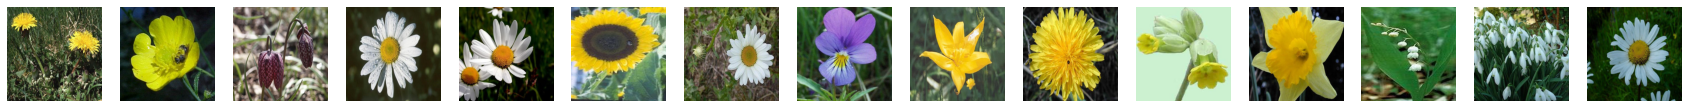

In [29]:
plt.figure(figsize = (30,6))
for i in range(15):
  plt.subplot(1,15,i+1)
  plt.imshow(X_test[i])
  plt.axis('off')
print(y_pred_cl[0:15])

### Print following plots
1. Plot training accuracy vs validation accuracy
2. Plot training loss vs validation loss

Text(0.5, 1.0, 'Training and validation loss')

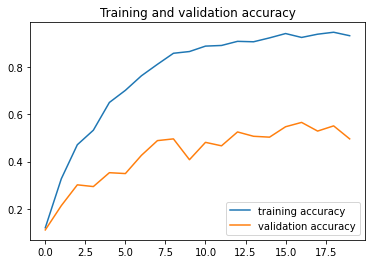

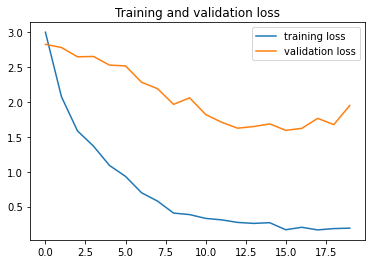

In [30]:
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
# Get number of epochs
plt.plot ( epochs, accuracy, label = 'training accuracy' )
plt.plot ( epochs, val_accuracy, label = 'validation accuracy' )
plt.title ('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()
plt.plot ( epochs, loss, label = 'training loss' )
plt.plot ( epochs, val_loss, label = 'validation loss' )
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss')

In [31]:
from tensorflow.keras.applications import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D

ResNet50_model = Sequential()
ResNet50_model.add(ResNet50(include_top=False, weights='imagenet', pooling='max'))
ResNet50_model.add(layers.Dense(17, activation='softmax'))

ResNet50_model.compile(loss='categorical_crossentropy', optimizer=tensorflow.keras.optimizers.Adam(learning_rate=2e-4), metrics=['acc'])

history_resnet = ResNet50_model.fit(X_train,y_train_n, batch_size=34, epochs=5, validation_data=(X_test,y_test_n),verbose =2)

Train on 1088 samples, validate on 272 samples
Epoch 1/10
1088/1088 - 19s - loss: 3.0666 - acc: 0.6636 - val_loss: 23.5986 - val_acc: 0.0809
Epoch 2/10
1088/1088 - 15s - loss: 0.1075 - acc: 0.9752 - val_loss: 18.6240 - val_acc: 0.0515
Epoch 3/10
1088/1088 - 15s - loss: 0.0715 - acc: 0.9862 - val_loss: 20.5242 - val_acc: 0.0515
Epoch 4/10
1088/1088 - 14s - loss: 0.0906 - acc: 0.9862 - val_loss: 20.4132 - val_acc: 0.0515
Epoch 5/10
1088/1088 - 14s - loss: 0.0302 - acc: 0.9936 - val_loss: 25.2383 - val_acc: 0.0515
Epoch 6/10
1088/1088 - 14s - loss: 0.0304 - acc: 0.9926 - val_loss: 28.9967 - val_acc: 0.0515
Epoch 7/10
1088/1088 - 14s - loss: 0.0263 - acc: 0.9926 - val_loss: 24.8511 - val_acc: 0.0515
Epoch 8/10
1088/1088 - 14s - loss: 0.0137 - acc: 0.9972 - val_loss: 25.1312 - val_acc: 0.0625
Epoch 9/10
1088/1088 - 14s - loss: 0.0147 - acc: 0.9954 - val_loss: 30.8359 - val_acc: 0.0588
Epoch 10/10
1088/1088 - 14s - loss: 0.0093 - acc: 0.9972 - val_loss: 16.4442 - val_acc: 0.0478


- After Using ResNet Model, we are getting very low accuracy on validation test.
- As compared with the manual model vs Transfer learned ResNet model, our data is performing well on manually built model.
- We can use this image classifier model in classifying these 17 flowers specifically.
- We can add it as a feature in camera app and it can classify the image as soon as it captured. 